## 国际象棋对局MultiDiGraph多路图可视化
[参考文档](https://networkx.org/documentation/stable/auto_examples/drawing/plot_chess_masters.html#sphx-glr-download-auto-examples-drawing-plot-chess-masters-py)

[数据集下载](https://chessproblem.my-free-games.com/chess/games/Download-PGN.php)

In [1]:
import networkx as nx

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
game_details = ["Event", "Date", "Result", "ECO", "Site"]


def chess_pgn_graph(pgn_file="data/WCC.pgn"):
    """Read chess games in pgn format in pgn_file.

    Return the MultiDiGraph of players connected by a chess game.
    Edges contain game data in a dict.

    """

    G = nx.MultiDiGraph()
    game = {}
    with open(pgn_file, 'r') as datafile:
        lines = [line.rstrip("\r\n") for line in datafile]
    for line in lines:
        if line.startswith("["):
            tag, value = line[1:-1].split(" ", 1)
            game[str(tag)] = value.strip('"')
        else:
            # empty line after tag set indicates
            # we finished reading game info
            if game:
                white = game.pop("White")
                black = game.pop("Black")
                G.add_edge(white, black, **game)
                game = {}
    return G

In [3]:
# 如果有csv文件可以这样做
# G = nx.from_pandas_edgelist(df, 'White', 'Black', edge_attr=True, create_using=nx.MultiDiGraph())
G = chess_pgn_graph()

In [4]:
print(f'棋手(节点)个数: {G.number_of_nodes()}')
print(f'棋局(连接)个数: {G.number_of_edges()}')

棋手(节点)个数: 25
棋局(连接)个数: 685


In [5]:
# 所有节点
G.nodes

NodeView(('Zukertort, Johannes H', 'Steinitz, Wilhelm', 'Chigorin, Mikhail I', 'Gunsberg, Isidor A', 'Lasker, Emanuel', 'Marshall, Frank J', 'Tarrasch, Siegbert', 'Janowski, Dawid M', 'Schlechter, Carl', 'Capablanca, Jose Raul', 'Alekhine, Alexander A', 'Bogoljubow, Efim D', 'Euwe, Max', 'Keres, Paul', 'Smyslov, Vassily V', 'Reshevsky, Samuel H', 'Botvinnik, Mikhail M', 'Bronstein, David I', 'Tal, Mikhail N', 'Petrosian, Tigran V', 'Spassky, Boris V', 'Fischer, Robert J', 'Korchnoi, Viktor L', 'Karpov, Anatoly', 'Kasparov, Gary'))

In [6]:
# 所有节点（带特征）
G.edges(data=True)

OutMultiEdgeDataView([('Zukertort, Johannes H', 'Steinitz, Wilhelm', {'Event': 'World Championship 1st', 'Site': 'USA', 'Date': '1886.01.11', 'Round': '1', 'Result': '0-1', 'ECO': 'D11', 'EventDate': '1886.01.11'}), ('Zukertort, Johannes H', 'Steinitz, Wilhelm', {'Event': 'World Championship 1st', 'Site': 'USA', 'Date': '1886.01.15', 'Round': '3', 'Result': '1-0', 'ECO': 'D10', 'EventDate': '1886.01.11'}), ('Zukertort, Johannes H', 'Steinitz, Wilhelm', {'Event': 'World Championship 1st', 'Site': 'USA', 'Date': '1886.01.20', 'Round': '5', 'Result': '1-0', 'ECO': 'D10', 'EventDate': '1886.01.11'}), ('Zukertort, Johannes H', 'Steinitz, Wilhelm', {'Event': 'World Championship 1st', 'Site': 'USA', 'Date': '1886.02.05', 'Round': '7', 'Result': '0-1', 'ECO': 'D40', 'EventDate': '1886.01.11'}), ('Zukertort, Johannes H', 'Steinitz, Wilhelm', {'Event': 'World Championship 1st', 'Site': 'USA', 'Date': '1886.02.10', 'Round': '9', 'Result': '0-1', 'ECO': 'D26', 'EventDate': '1886.01.11'}), ('Zukert

In [7]:
# 两个棋手的所有棋局
G.get_edge_data('Zukertort, Johannes H', 'Steinitz, Wilhelm')

{0: {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.11',
  'Round': '1',
  'Result': '0-1',
  'ECO': 'D11',
  'EventDate': '1886.01.11'},
 1: {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.15',
  'Round': '3',
  'Result': '1-0',
  'ECO': 'D10',
  'EventDate': '1886.01.11'},
 2: {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.20',
  'Round': '5',
  'Result': '1-0',
  'ECO': 'D10',
  'EventDate': '1886.01.11'},
 3: {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.02.05',
  'Round': '7',
  'Result': '0-1',
  'ECO': 'D40',
  'EventDate': '1886.01.11'},
 4: {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.02.10',
  'Round': '9',
  'Result': '0-1',
  'ECO': 'D26',
  'EventDate': '1886.01.11'},
 5: {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.03.01',
  'Round': '11',
  'Result': '0-1',
  'ECO': 'C49',
  'EventDate': '1886.01.11'},
 6: {'Event': 'World Champi

初步可视化

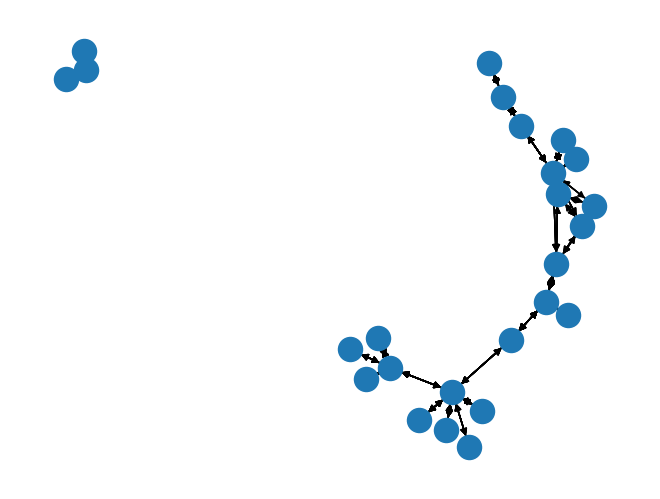

In [8]:
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos)

连通域分析

In [9]:
# 将G转为无向图 分析连通域
H = G.to_undirected()

In [10]:
for cc in nx.connected_components(H):
    print(f'连通域 {H.subgraph(cc)} 包含节点 {cc}\n')

连通域 MultiGraph with 22 nodes and 304 edges 包含节点 {'Fischer, Robert J', 'Alekhine, Alexander A', 'Chigorin, Mikhail I', 'Janowski, Dawid M', 'Marshall, Frank J', 'Smyslov, Vassily V', 'Tarrasch, Siegbert', 'Capablanca, Jose Raul', 'Euwe, Max', 'Lasker, Emanuel', 'Bogoljubow, Efim D', 'Petrosian, Tigran V', 'Keres, Paul', 'Reshevsky, Samuel H', 'Bronstein, David I', 'Gunsberg, Isidor A', 'Zukertort, Johannes H', 'Botvinnik, Mikhail M', 'Steinitz, Wilhelm', 'Schlechter, Carl', 'Spassky, Boris V', 'Tal, Mikhail N'}

连通域 MultiGraph with 3 nodes and 49 edges 包含节点 {'Karpov, Anatoly', 'Kasparov, Gary', 'Korchnoi, Viktor L'}



高级可视化

In [11]:
# 将G转为无向-单连接图
H = nx.Graph(G)

In [12]:
H.edges()

EdgeView([('Zukertort, Johannes H', 'Steinitz, Wilhelm'), ('Steinitz, Wilhelm', 'Chigorin, Mikhail I'), ('Steinitz, Wilhelm', 'Gunsberg, Isidor A'), ('Steinitz, Wilhelm', 'Lasker, Emanuel'), ('Lasker, Emanuel', 'Marshall, Frank J'), ('Lasker, Emanuel', 'Tarrasch, Siegbert'), ('Lasker, Emanuel', 'Janowski, Dawid M'), ('Lasker, Emanuel', 'Schlechter, Carl'), ('Lasker, Emanuel', 'Capablanca, Jose Raul'), ('Capablanca, Jose Raul', 'Alekhine, Alexander A'), ('Alekhine, Alexander A', 'Bogoljubow, Efim D'), ('Alekhine, Alexander A', 'Euwe, Max'), ('Euwe, Max', 'Keres, Paul'), ('Euwe, Max', 'Smyslov, Vassily V'), ('Euwe, Max', 'Botvinnik, Mikhail M'), ('Euwe, Max', 'Reshevsky, Samuel H'), ('Keres, Paul', 'Smyslov, Vassily V'), ('Keres, Paul', 'Botvinnik, Mikhail M'), ('Keres, Paul', 'Reshevsky, Samuel H'), ('Smyslov, Vassily V', 'Reshevsky, Samuel H'), ('Smyslov, Vassily V', 'Botvinnik, Mikhail M'), ('Reshevsky, Samuel H', 'Botvinnik, Mikhail M'), ('Botvinnik, Mikhail M', 'Bronstein, David I')

In [13]:
# 两个棋手的所有棋局
len(G.get_edge_data('Zukertort, Johannes H', 'Steinitz, Wilhelm'))

10

In [14]:
# 两个棋手之间的 连接宽度 与 棋局个数 成正比
edge_width=[len(G.get_edge_data(u, v)) for u,v in H.edges()]

edge_width

[10,
 19,
 10,
 9,
 7,
 8,
 11,
 5,
 7,
 17,
 26,
 27,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 37,
 2,
 12,
 21,
 11,
 23,
 11,
 25,
 24]

In [15]:
# 棋手节点大小 与 赢棋次数 成正比
wins = dict.fromkeys(G.nodes(), 0)  # 生成每个棋手作为key的dict
for (u, v, d) in G.edges(data=True):
    r = d['Result'].split('-')
    if r[0] == '1':
        wins[u] += 1.0
    elif r[0] == '1/2':
        wins[u] += 0.5
        wins[v] += 0.5
    else:
        wins[v] += 1.0
node_size = [wins[v] * 50 for v in H]

wins

{'Zukertort, Johannes H': 7.5,
 'Steinitz, Wilhelm': 53.0,
 'Chigorin, Mikhail I': 17.0,
 'Gunsberg, Isidor A': 8.5,
 'Lasker, Emanuel': 61.5,
 'Marshall, Frank J': 3.5,
 'Tarrasch, Siegbert': 5.5,
 'Janowski, Dawid M': 3.5,
 'Schlechter, Carl': 5.0,
 'Capablanca, Jose Raul': 24.5,
 'Alekhine, Alexander A': 79.5,
 'Bogoljubow, Efim D': 20.0,
 'Euwe, Max': 29.0,
 'Keres, Paul': 10.5,
 'Smyslov, Vassily V': 46.0,
 'Reshevsky, Samuel H': 10.5,
 'Botvinnik, Mikhail M': 89.0,
 'Bronstein, David I': 12.0,
 'Tal, Mikhail N': 20.5,
 'Petrosian, Tigran V': 35.5,
 'Spassky, Boris V': 32.5,
 'Fischer, Robert J': 12.5,
 'Korchnoi, Viktor L': 23.0,
 'Karpov, Anatoly': 52.0,
 'Kasparov, Gary': 23.0}

In [16]:
node_size

[375.0,
 2650.0,
 850.0,
 425.0,
 3075.0,
 175.0,
 275.0,
 175.0,
 250.0,
 1225.0,
 3975.0,
 1000.0,
 1450.0,
 525.0,
 2300.0,
 525.0,
 4450.0,
 600.0,
 1025.0,
 1775.0,
 1625.0,
 625.0,
 1150.0,
 2600.0,
 1150.0]

In [17]:
# 布局
pos = nx.kamada_kawai_layout(H)

# 手动微调节点的横坐标(越大越靠右)、纵坐标(越大越靠下)
pos['Reshevsky, Samuel H'] += (0.05, -0.10)
pos['Botvinnik, Mikhail M'] += (0.03, -0.06)
pos['Smyslov, Vassily V'] += (0.05, -0.03)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


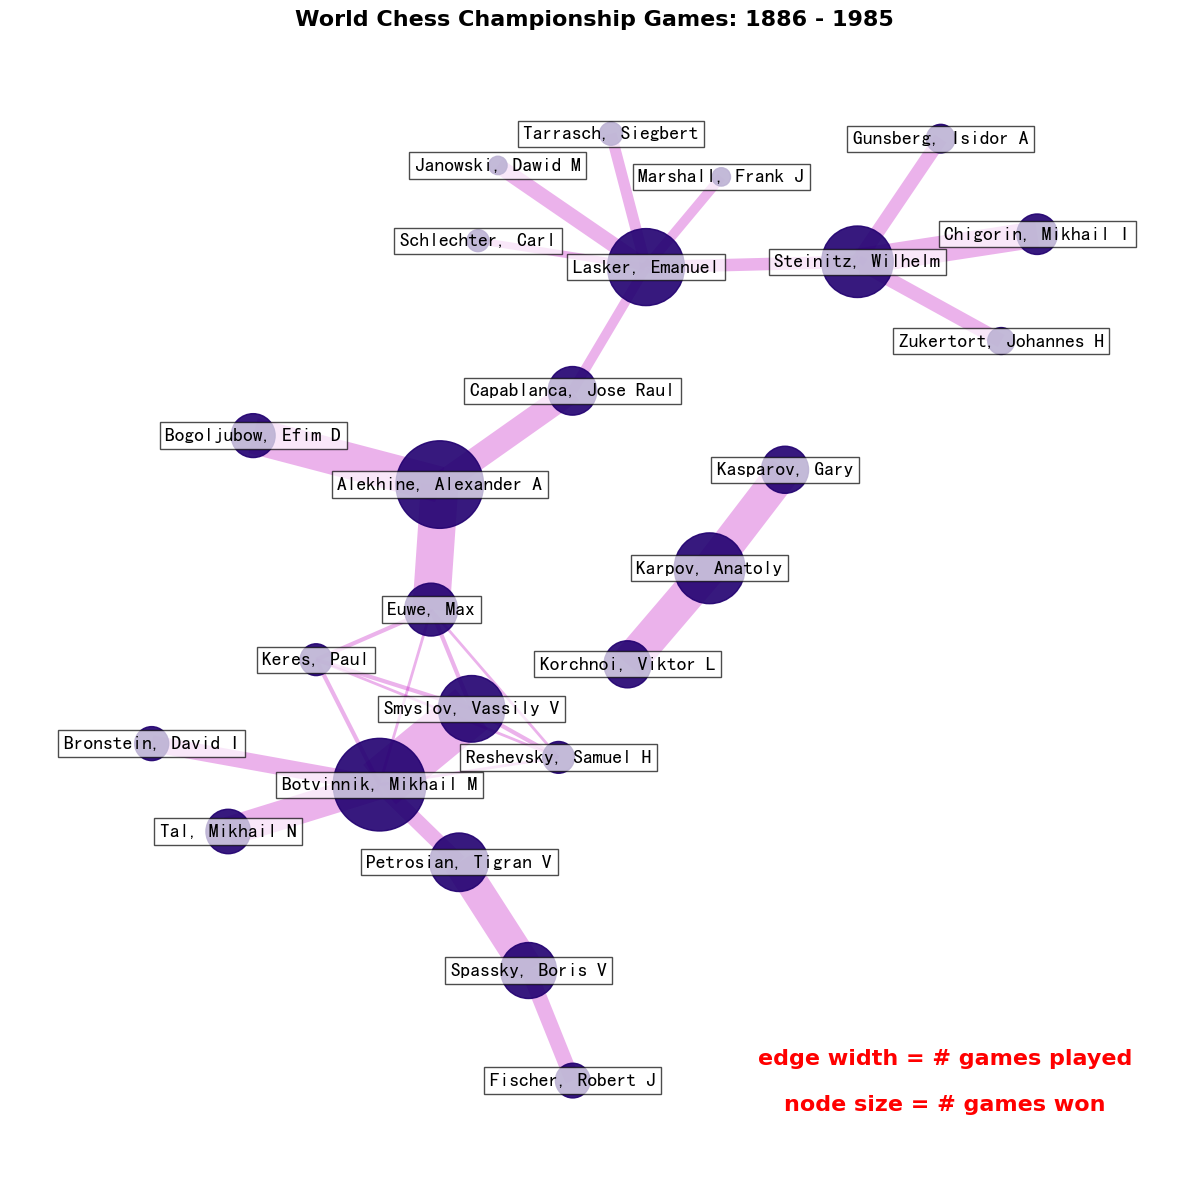

In [18]:
fig, ax = plt.subplots(figsize=(12, 12))

# 可视化连接
nx.draw_networkx_edges(H, pos, alpha=0.3, width=edge_width, edge_color='m')

# 可视化节点
nx.draw_networkx_nodes(H, pos, node_size=node_size, node_color='#210070', alpha=0.9)

# 节点名称文字说明
label_options = {'ec': 'k', 'fc': 'white', 'alpha': 0.7}
nx.draw_networkx_labels(H, pos, font_size=14, bbox=label_options)

# 标题和图例
font = {"fontname": "Helvetica", "color": "k", "fontweight": "bold", "fontsize": 16}
ax.set_title("World Chess Championship Games: 1886 - 1985", font)
# 图例字体颜色
font["color"] = "r"

# 文字说明
ax.text(
    0.80,
    0.10,
    "edge width = # games played",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

ax.text(
    0.80,
    0.06,
    "node size = # games won",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# 调整图的大小，提高可读性
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()
